**Problem Statement.**

As Data Scientist, I will find out which day of the weekend has the most number of blue cars taken and returned. And confirm the claim that Sunday is the day of the week when most bluecars are taken and retured not Saturday.

**Objectives**

Do data preprocessing on the data.
Univariate and bivariate analysis.
Implement soution

###Importing Libraries and Loading Dataset

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
dataset = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")

###Review Dataset

In [271]:
dataset.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [272]:
dataset.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [273]:
# checking number of rows and column
dataset.shape

(16085, 13)

In [274]:
#dataset summary
dataset.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [275]:
#checking for data types
dataset.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [276]:
#checking on columns
dataset.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [277]:
# replacing space with underscore on column names
# Rename columns
col_names = dataset.columns.tolist()
for col in range(len(col_names)):
  col_names[col] = col_names[col].lower().replace(" ", "_")

dataset.columns = col_names

In [278]:
dataset.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

###Data Preprocessing

In [279]:
#checking for null values
dataset.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [280]:
#checking for duplicates
dataset.duplicated().sum()

0

In [281]:
# Dealing with outliers

# quantiles
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the dataframe 'df'
df = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df.shape)
# Printing the shape of our old dataset
print(dataset.shape)

(9783, 13)
(16085, 13)


In [282]:
# Number of unique values in every column
df.nunique()

postal_code                79
date                      130
n_daily_data_points         3
dayofweek                   7
day_type                    2
bluecars_taken_sum        275
bluecars_returned_sum     269
utilib_taken_sum           11
utilib_returned_sum        11
utilib_14_taken_sum        24
utilib_14_returned_sum     24
slots_freed_sum            13
slots_taken_sum            13
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


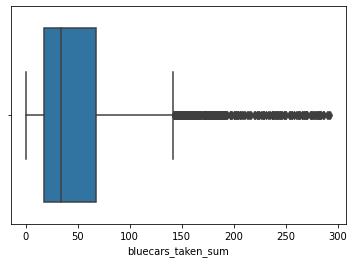

In [283]:
sns.boxplot(df['bluecars_taken_sum'])

In [284]:
# Dropping irrelevant columns

df.drop(['postal_code','date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum',
         'utilib_14_returned_sum','slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,0,weekday,19,9
3900,1,weekday,10,10
3901,2,weekday,11,13
3903,4,weekday,10,6
3905,6,weekend,28,17


In [285]:
#Changing the days of the week from numerical representations to actual days
df["dayofweek"].replace({0: "Mon", 1: "Tue", 2: "Wed", 3: "Thur", 4: "Fri", 5: "Sat", 6: "Sun"}, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,Mon,weekday,19,9
3900,Tue,weekday,10,10
3901,Wed,weekday,11,13
3903,Fri,weekday,10,6
3905,Sun,weekend,28,17


###Exploratory Data Analysis

####Univariate Analysis

######*selection requires one set of data which is either weekends or weekdays, I chose to work with the weekends.

In [286]:
# Focusing our data on the Weekend Data

weekend =df[df.day_type == 'weekend']
weekend.head()

,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3905,Sun,weekend,28,17
3911,Sat,weekend,24,21
3912,Sun,weekend,27,30
3918,Sat,weekend,16,10
3919,Sun,weekend,18,14


In [287]:
weekend.shape

(2963, 4)

In [288]:
weekend['dayofweek'].value_counts(normalize=True)*100

Sun    52.78434
Sat    47.21566
Name: dayofweek, dtype: float64

In [289]:
weekend.describe()

,bluecars_taken_sum,bluecars_returned_sum
count,2963.000000,2963.000000
mean,57.718529,57.354708
std,48.991550,49.600634
min,0.000000,0.000000
25%,21.000000,20.000000
50%,43.000000,42.000000
75%,82.000000,82.000000
max,293.000000,301.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

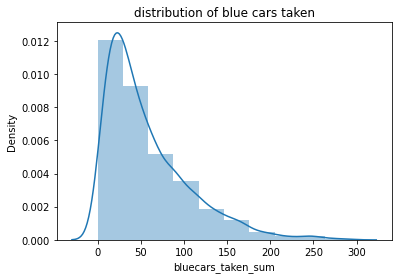

In [290]:
# Plot bluecars taken
sns.distplot(weekend['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars returned')

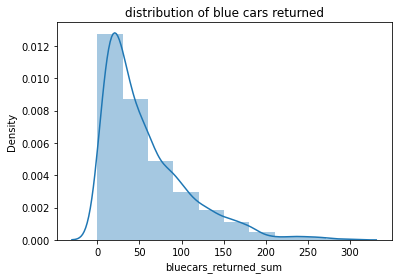

In [291]:
# Plot bluecars returned 
sns.distplot(weekend['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

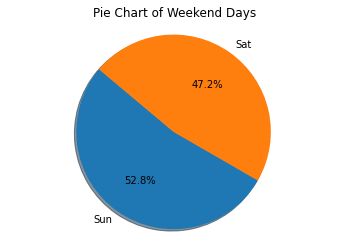

In [292]:
day = weekend['dayofweek'].value_counts()
labels =weekend['dayofweek'].unique()

plt.pie(day, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Weekend Days')
plt.show()

In [293]:
new_df = weekend.groupby(['dayofweek'])['bluecars_returned_sum','bluecars_taken_sum'].sum()
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,bluecars_returned_sum,bluecars_taken_sum
dayofweek,,
Sat,81719,83216
Sun,88223,87804


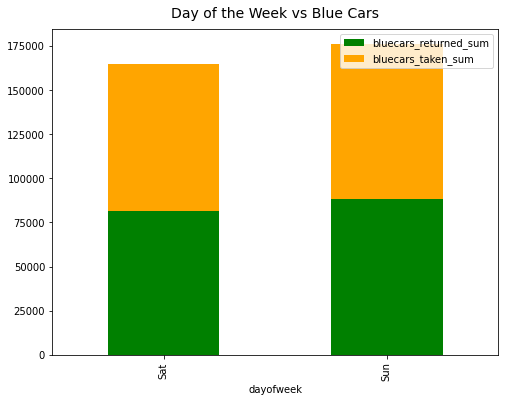

In [294]:
#plot
color = ["green",'orange']
new_df.plot(kind='bar', figsize=(8, 6), color=color,stacked=True)
plt.title('Day of the Week' + " vs Blue Cars", fontsize=14, y=1.015)
plt.ylabel='Blue Cars'
plt.xlabel=('Day of the Week')
plt.show()

####Bivariate Analysis

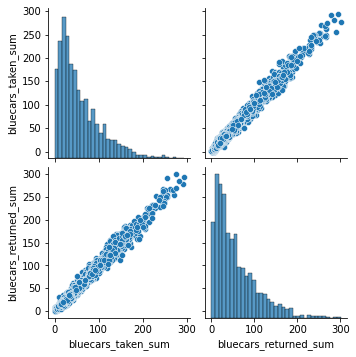

In [295]:
sns.pairplot(weekend)
plt.show()

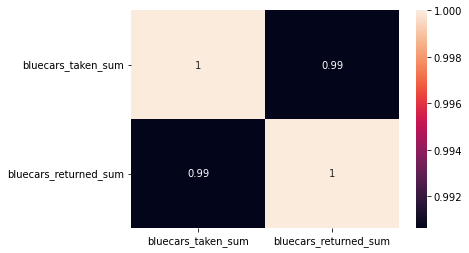

In [296]:
sns.heatmap(weekend.corr(),annot=True)
plt.show()

<function matplotlib.pyplot.show>

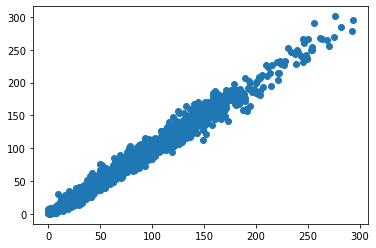

In [297]:
plt.scatter(weekend['bluecars_taken_sum'],weekend['bluecars_returned_sum'])
plt.show

###**IMPLEMENTING THE SOLUTION**

####**Hypothesis Testing**

**H0** : Average number of BlueCars taken and return on Sunday is equal to number of BlueCars taken and returned on Saturday.


**H1** : Average number of Bluecars taken and returned on Saturday is less than those of Sunday **(CLAIM)**

**One-Side Tail Test**

**Significance Level = 0.05**

In [300]:
# creating a total car column 

sum_column = weekend["bluecars_taken_sum"] + weekend["bluecars_returned_sum"]
weekend["total_cars"] = sum_column
weekend.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,total_cars
3905,Sun,weekend,28,17,45
3911,Sat,weekend,24,21,45
3912,Sun,weekend,27,30,57


In [301]:
# Dropping the irrelevant columns

weekend.drop(['day_type','bluecars_taken_sum','bluecars_returned_sum'], axis=1, inplace=True)
weekend.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['dayofweek', 'total_cars'], dtype='object')

#####Random Sampling the data 

In [302]:
# Split the data to Sunday and Saturday
sun_df = weekend[weekend.dayofweek == "Sun"]

# Getting a sample for analysis
np.random.seed(500)
sun_sample= sun_df.sample(n = 600, replace="False")
sun_sample.head(10)

,dayofweek,total_cars
10799,Sun,72
11550,Sun,42
6250,Sun,123
11599,Sun,25
6359,Sun,70
8592,Sun,69
15881,Sun,30
10701,Sun,61
9905,Sun,226
6250,Sun,123


In [303]:
sat_df = weekend[weekend.dayofweek == "Sat"]

# Getting a Saturday sample for analysis
np.random.seed(500)
sat_sample= sat_df.sample(n = 600, replace="False")
sat_sample.head(10)

,dayofweek,total_cars
11629,Sat,49
12383,Sat,95
6493,Sat,146
12429,Sat,103
6607,Sat,204
9104,Sat,45
11524,Sat,35
10644,Sat,136
6493,Sat,146
5990,Sat,124


####Test Statistic

In [330]:
import math
import scipy.stats as stats
from scipy.stats import norm

In [338]:
sun_pop_mean = sun_df['total_cars'].mean()
sat_pop_mean = sat_df['total_cars'].mean()
pop_std_sun = sun_df['total_cars'].std()
pop_std_sat = sat_df['total_cars'].std()
xbar_sun =sun_sample['total_cars'].mean()
xbar_sat =sat_sample['total_cars'].mean()
n_sun = sun_sample.shape[0]
n_sat = sat_sample.shape[0]

**Test Statistic** - **z-test for Population Mean of two Samples**(Sunday and Saturday Samples)

Using z-test since we have the population means and the population standard deviations plus ou sample size is more than 30

In [339]:
num =(xbar_sun-sun_pop_mean)-(xbar_sat-sat_pop_mean)
denom =(pop_std_sun/math.sqrt(n_sun))+ (pop_std_sat/math.sqrt(n_sat))
z_score = num/denom
z_score
pvalue = stats.norm.cdf(z_score)

print('t-statistic = %6.3f p-value = %6.4f' % (z_score,pvalue))

t-statistic = -0.147 p-value = 0.4415


p-value is 0.4415 which is less than the 0.05 level of significance.

**Conclusion** :

We **reject the null hypothesis**(That the Average number of bluecars taken and returned on weekend days are equal) in favor of the alternative hyposthesis (Average bluescars taken and returned on Saturday are indeed less than on Sunday)

There was enough evidence to show that the average of bluecars taken and returned on Saturday was indeed less than the average on Sunday.

### Point Estimate

In [334]:
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

sun_df['total_cars'].mean() - sun_sample['total_cars'].mean()

5.217566069906226

In [335]:
sat_df['total_cars'].mean() - sat_sample['total_cars'].mean()

4.0349249463902765

In [348]:
sample_mean = xbar_sun - xbar_sat
q= 1-pvalue

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        
pop_stdev =pop_std_sun + pop_std_sat

margin_of_error = z_critical * (pop_stdev/math.sqrt(1200))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(-17.67156512894158, 4.614898462274908)
